In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("BreastCancer.csv")
df.head()

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign


In [5]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class_Malignant
0,61634,5,4,3,1,2,2,2,3,1,False
1,63375,9,1,2,6,4,10,7,7,2,True
2,76389,10,4,7,2,2,8,6,1,1,True
3,95719,6,10,10,10,8,10,7,10,7,True
4,128059,1,1,1,1,2,5,5,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...
694,1369821,10,10,10,10,5,10,10,10,7,True
695,1371026,5,10,10,10,4,10,5,6,3,True
696,1371920,5,1,1,1,2,1,3,2,1,False
697,8233704,4,1,1,1,1,1,2,1,1,False


In [7]:
# Seperating the dependent and independent data
X = df_encoded.iloc[:,1:-1]
y = df_encoded.iloc[:,-1]

In [9]:
# Train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [10]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

In [12]:
# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[129   9]
 [  1  71]]
              precision    recall  f1-score   support

       False       0.99      0.93      0.96       138
        True       0.89      0.99      0.93        72

    accuracy                           0.95       210
   macro avg       0.94      0.96      0.95       210
weighted avg       0.96      0.95      0.95       210

0.9523809523809523


In [14]:
# ROC and roc curve
from sklearn.metrics import roc_curve, roc_auc_score
# Compute predicted probabilities: y_pred_prob
y_probs = gnb.predict_proba(X_test)
y_pred_prob = y_probs[:,1]

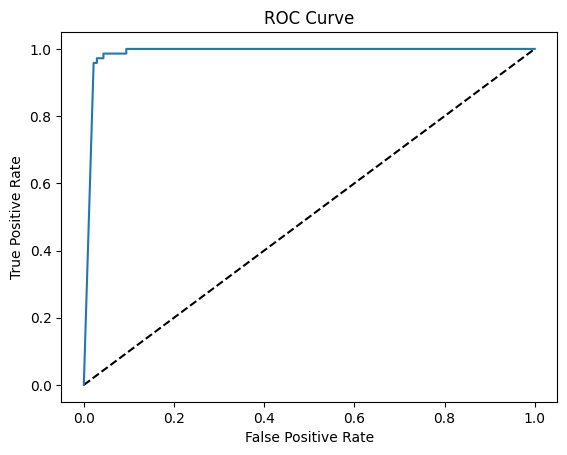

0.9872685185185185


In [15]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print(roc_auc_score(y_test, y_pred_prob))